# **Pemodelan Emosi Teks dengan Pendekatan NLP dan Pembelajaran Mesin**







# **Introduction** KELOMPOK 1 (kelas 14)
---
1. Wahyu Satrio-Institut Teknologi PLN-S1 Teknik Informatika-Batch 6
2. Wanto Widodo-Universitas Alma Ata Yogyakarta-S1 Informatika-Bacth 6
3. Wildan Mauli Darojat-Universitas Pendidikan Indonesia-S1 Ilmu Komputer-Batch 6
4. Yudi Aditya Pratama-Universitas Islam Sultan Agung Semarang-S1 Teknik Informatika-Batch 6
5. Yusuf Alfiansyah Kasdini-Universitas Brawijaya-S1 Ilmu Perpustakaan-Batch 6
6. Zidan Amukti Rajendra-Universitas Indonesia-S1 Sistem Informasi-Batch 6

---
#**Background**
---
1.Pemrosesan bahasa alami (NLP)

adalah cabang kecerdasan buatan yang fokus pada interaksi antara komputer dan bahasa manusia. NLP telah digunakan dalam berbagai aplikasi seperti analisis teks, terjemahan bahasa, dan chatbot. Di sisi lain, pembelajaran mesin adalah teknik yang memungkinkan sistem untuk belajar dari data dan meningkatkan kinerja berdasarkan pengalaman.

---


2.Pemodelan emosi teks adalah

proses menganalisis teks untuk mengidentifikasi dan mengklasifikasikan emosi yang terkandung di dalamnya, seperti kebahagiaan, kesedihan, kemarahan, dan lain-lain. Pendekatan NLP untuk pemodelan emosi melibatkan penggunaan algoritma untuk memproses dan menganalisis teks, sementara pembelajaran mesin dapat digunakan untuk melatih model yang mampu mengenali pola emosional dalam data teks.

# **Problem Statement**
---
Emosi yang diekspresikan dalam teks memainkan peran penting dalam berbagai domain, seperti analisis sentimen, layanan pelanggan, interaksi media sosial, dan kesehatan mental. Meskipun telah ada kemajuan dalam pemrosesan bahasa alami (NLP) dan pembelajaran mesin, pemodelan emosi dalam teks tetap menjadi tantangan karena sifat bahasa yang kompleks dan nuansa emosional yang beragam. Oleh karena itu, diperlukan pendekatan yang efektif untuk mengidentifikasi dan mengklasifikasikan emosi dalam teks dengan tingkat akurasi yang tinggi.

Pendekatan NLP (Natural Language Processing) dan Pembelajaran Mesin (Machine Learning) memainkan peran penting dalam pemodelan emosi teks. NLP digunakan untuk memproses dan memahami teks, sedangkan Pembelajaran Mesin digunakan untuk melatih model yang dapat mengklasifikasikan emosi dengan akurat.

------

# **Data Loading**

In [124]:
#from google.colab import drive

#drive.mount('/content/drive')

digunakan untuk menghubungkan atau "mount" Google Drive Anda ke lingkungan Google Colab

In [125]:
!pip install nltk

perintah pip install nltk, Anda menginstruksikan pip untuk mengunduh dan menginstal pustaka NLTK beserta semua dependensi yang diperlukan sehingga dapat menggunakannya dalam proyek atau analisis.

In [126]:
!pip install textstat

Dengan menjalankan perintah !pip install textstat,menginstruksikan pip untuk mengunduh dan menginstal pustaka textstat beserta semua dependensi yang diperlukan sehingga dapat menggunakannya dalam proyek atau analisis

In [127]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import textstat

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

Kode ini mengimpor berbagai alat dan pustaka yang sangat berguna untuk berbagai tugas dalam analisis data, pemrosesan teks, dan pembelajaran mesin

### Untuk Import Di Google Collab dan VS Code

In [128]:
# Memuat data dari tiga file CSV dan menampilkan informasi tentang ukuran data yang dimuat

#test = pd.read_csv('/content/drive/MyDrive/collab/emo_test.csv')
#train = pd.read_csv('/content/drive/MyDrive/collab/emo_train.csv')
#val = pd.read_csv('/content/drive/MyDrive/collab/emo_val.csv')

test = pd.read_csv('emo_test.csv')
train = pd.read_csv('emo_train.csv')
val = pd.read_csv('emo_val.csv')

train.shape , val.shape , test.shape

((3613, 2), (347, 2), (3142, 2))

In [129]:
# Menampilkan dataframe "test"
test.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


from google.colab import drive

drive.mount('/content/drive')

In [130]:
# Menampilkan dataframe "train"
train.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [131]:
# Menampilkan dataframe "val"
val.head()

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",joy
1,Nawaz Sharif is getting more funnier than @kap...,joy
2,Nawaz Sharif is getting more funnier than @kap...,joy
3,@tomderivan73 😁...I'll just people watch and e...,joy
4,I love my family so much #lucky #grateful #sma...,joy


# **EDA**

In [132]:
# Menggabungkan dataset "test", "train", dan "val" menjadi satu DataFrame untuk analisis lebih lanjut

data = pd.concat([train, val, test], axis=0)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,text,label
0,Imagine celtic burst the net wae every attempt...,anger
1,@_wednesdaychild I need to cheer up,joy
2,@riinkanei he's a horrible person and now i ga...,fear
3,@annafifield @washingtonpost all hands on deck...,fear
4,"Gahh...BT, in queue for 30 minutes.. Now put t...",fear


In [133]:
# Menampilkan beberapa baris terakhir dari DataFrame
data.tail()

,text,label
7097,"@chutneysupercat hi lovely brownie, MM is call...",fear
7098,"@LucidHurricane_ wait, you mean he wasn't arme...",fear
7099,@tomsteinfort expected i thought #fear,fear
7100,@Koishiteruze she was scare not knowing what t...,fear
7101,@officialShaky 'Operation Echoes' is gathering...,fear


In [134]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50: # Mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

label : ['anger' 'joy' 'fear' 'sadness']


In [135]:
# Memuat ringkasan informasi tentang DataFrame yang digunakan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7102 non-null   object
 1   label   7102 non-null   object
dtypes: object(2)
memory usage: 111.1+ KB


In [136]:
# Memberikan ringkasan statistik deskriptif untuk kolom-kolom non-numerik
data.describe()

,text,label
count,7102,7102
unique,6908,4
top,"Just watched Django Unchained, Other people ma...",fear
freq,3,2252


In [137]:
# Memeriksa apakah ada baris duplikat
data.duplicated().any()

False

In [138]:
# Digunakan untuk menghitung frekuensi setiap baris unik dalam data tersebut
data.value_counts()

text                                                                                                                                          label  
 I can't guess if you holding a grudge against the best'                                                                                      anger      1
Just over a week until I start my new job in F1! Looking forward to it and cacking myself at the same time! #nervous                          fear       1
Just want Saturday to be over but then again I want to do good #LSAT                                                                          fear       1
Just told me wife there was a chance it would be 2 Sydney teams in AFL grand final. Her response: 'there's two SYDNEY AFL teams?' #serious    sadness    1
Just seeing Alex revells face gets me angry                                                                                                   anger      1
                                                                           

# **Praproses**

In [139]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoji
        u"\U0001F300-\U0001F5FF"  # Simbol & piktogram
        u"\U0001F680-\U0001F6FF"  # Simbol transportasi & peta
        u"\U0001F1E0-\U0001F1FF"  # Bendera
        u"\U00002500-\U00002BEF"  # Karakter
        u"\U00002702-\U000027B0"  # Karakter tambahan
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"                 # Karakter tambahan
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data) # Mengganti (substitusi) semua karakter emoji yang cocok dengan string kosong, sehingga menghapusnya dari teks yang diberikan.

In [140]:
!pip install symspellpy

In [141]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from symspellpy.symspellpy import SymSpell

stemmer = SnowballStemmer('english')  # Inisialisasi objek stemmer dengan SnowballStemmer untuk bahasa Inggris
lemmatizer = WordNetLemmatizer()  # Inisialisasi objek lemmatizer dengan WordNetLemmatizer
symspell = SymSpell()  # Inisialisasi objek symspell untuk koreksi ejaan

def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(token) for token in text.split()])
def spelling_correction(text):
    correct_spellings = []

    for token in text.split():
        x = symspell.lookup(token, Verbosity.CLOSEST, max_edit_distance=2, include_unknown=True)[0].__str__()  # Mencari kata terdekat dalam symspell
        y = x.split(',')[0]  # Mengambil kata hasil koreksi
        correct_spellings.append(y)  # Menambahkan kata hasil koreksi ke dalam list

    return ' '.join(correct_spellings)  # Mengembalikan teks yang sudah dikoreksi ejaan


In [142]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\GAMING
[nltk_data]     3I\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\GAMING
[nltk_data]     3I\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\GAMING
[nltk_data]     3I\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [143]:
import re
from symspellpy.symspellpy import SymSpell, Verbosity
from bs4 import BeautifulSoup
def text_preprocess(text):
    text = str(text).lower() # Mengubah seluruh teks menjadi huruf kecil untuk konsistensi.
    text = text.replace(',000,000,000 ', 'b ') # Mengganti angka yang mewakili jumlah,  diganti dengan representasi yang lebih singkat (misalnya, "1,000,000" menjadi "b").
    text = text.replace(',000,000 ', 'm ')
    text = text.replace(',000 ', 'k ')
    text = re.sub(r'([0-9]+)000000000', r'\1b', text) # Mengganti angka milyaran dengan 'b'
    text = re.sub(r'([0-9]+)000000', r'\1m', text) # Mengganti angka juta dengan 'm'
    text = re.sub(r'([0-9]+)000', r'\1k', text) # Mengganti angka ribuan dengan 'k'

    # Daftar contractions yang akan diubah menjadi bentuk lengkap
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    text_decontracted = []

    # Mendefinisikan contractions yang akan diubah menjadi bentuk lengkap
    for word in text.split():
        if word in contractions:
            word = contractions[word]
        text_decontracted.append(word)

    # Meloopi kata-kata dalam teks, jika ada contractions yang ditemukan, menggantinya dengan bentuk lengkap
    text_decontracted = ' '.join(text_decontracted)
    text = ' '.join([word for word in text_decontracted.split() if word.lower() not in stopwords.words('english') and not word.isdigit()])

    # Menghapus kata-kata yang tidak relevan
    text = text.replace("'ve", " have")
    text = text.replace("n't", " not")
    text = text.replace("'re", " are")
    text = text.replace("'ll", " will")

    # Melakukan stemming untuk mengubah kata-kata menjadi bentuk dasarnya
    text = stem_words(text)

    # Melakukan lemmatisasi untuk mengubah kata-kata menjadi kata dasarnya
    text = lemmatize_words(text)

    # Mengoreksi ejaan kata-kata yang salah.
    text = spelling_correction(text)

    # Menghapus tag HTML dari teks.
    text = BeautifulSoup(text)
    text = text.get_text()

    # Menghapus tanda baca
    pattern = re.compile('\W')
    text = re.sub(pattern, ' ', text).strip() # Menghapus karakter non-alfanumerik.

    # Menghapus emoji dari teks
    text = remove_emojis(text)

    return text

#Konversi data menjadi DataFrame
df = pd.DataFrame(data, columns=['text', 'label'])

# Terapkan preprocessing ke kolom 'text'
df['text'] = df['text'].apply(text_preprocess)

print(df.head(5))

C:\Users\GAMING 3I\AppData\Local\Temp\ipykernel_25752\1916465206.py:162: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text)


                                                text  label
0  imagin celtic burst net wae everi attempt nutt...  anger
1                         _wednesdaychild need cheer    joy
2        riinkanei horribl person gag see peopl quot   fear
3  annafifield  washingtonpost hand deck post msm...   fear
4  gahh   bt queue minutes   put bt sport dept ca...   fear


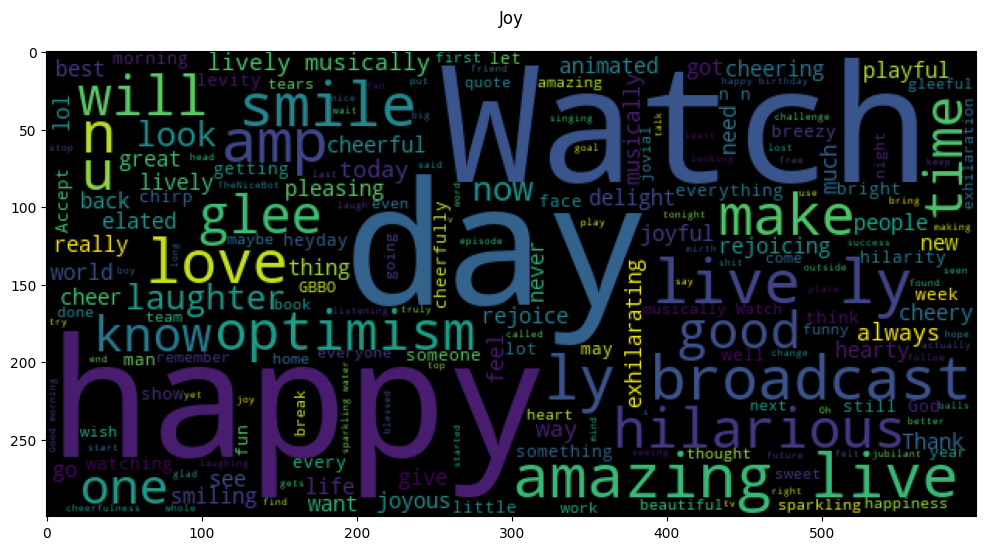

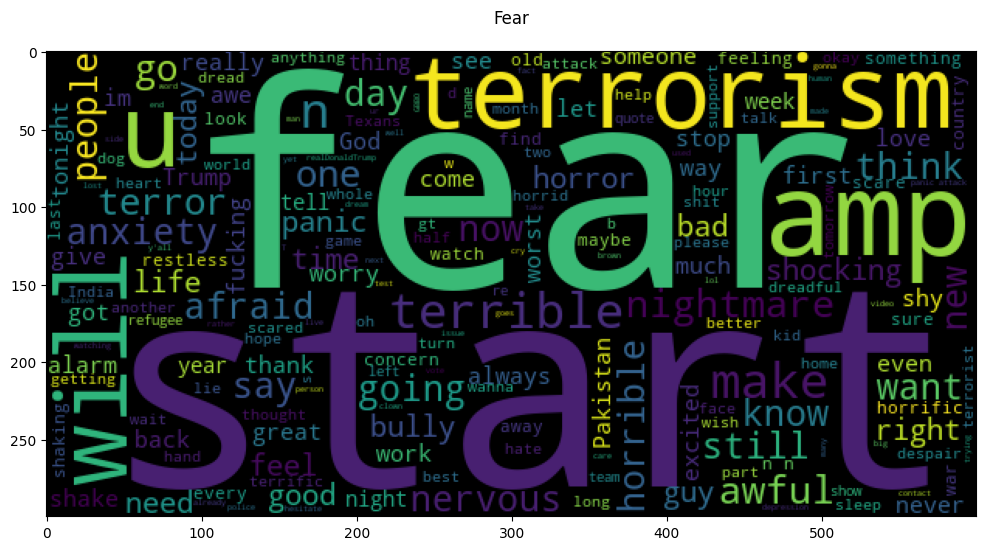

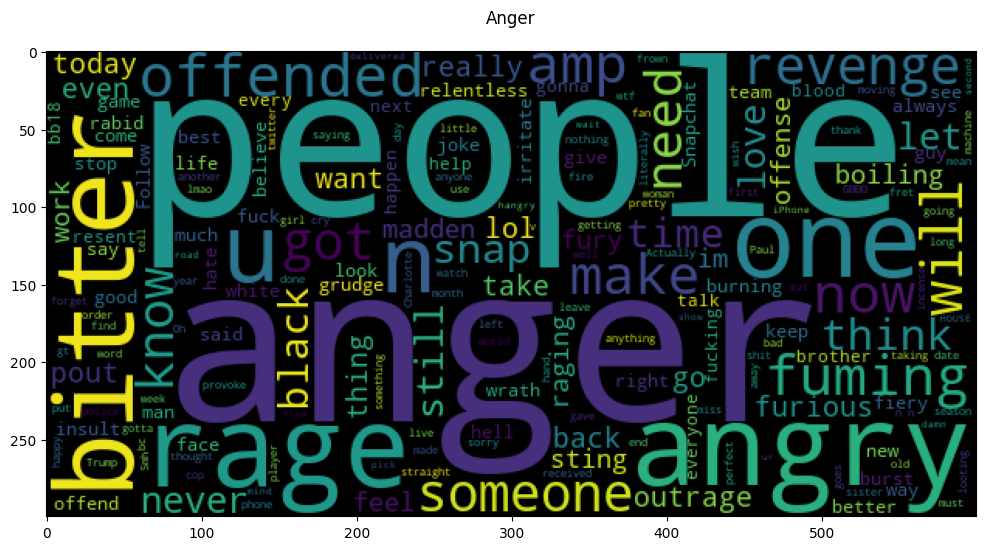

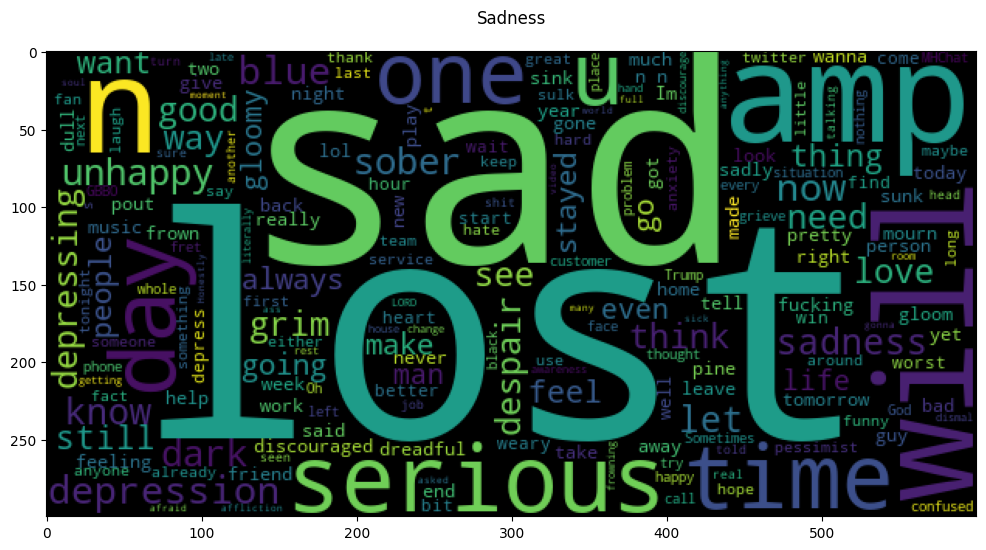

In [144]:
labels = list(train.label.unique()) # Mendapatkan daftar label/kata unik dari data "train"

for lab in labels:
    plt.figure(figsize=(12,8)) # Ukuran gambar
    wc = WordCloud(width=600,height=300).generate(' '.join(train[train.label==lab].text)) # Membuat WordCloud dengan teks yang sesuai dengan label saat ini
    plt.imshow(wc) # Menampilkan WordCloud
    plt.title(lab.title(),pad=20) # Memberi judul pada WordCloud dengan nama label saat ini
    plt.show() # Menampilkan plot
    print('\n\n')

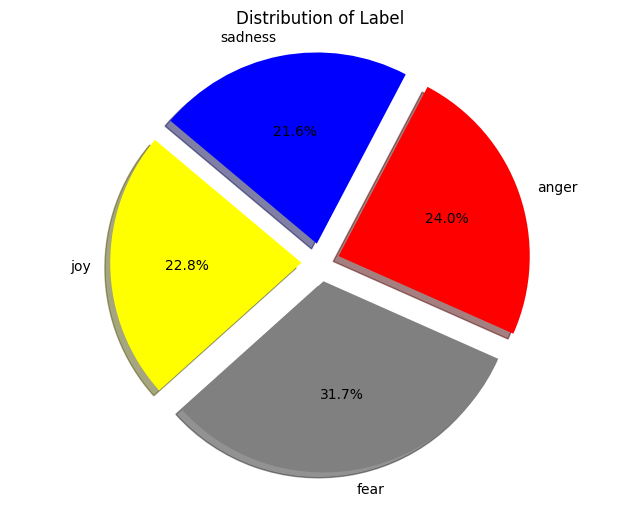

In [145]:
# Memeriksa apakah kolom 'label' ada dalam DataFrame 'data'
if 'label' in data.columns:

    label_counts = data['label'].value_counts()
    labels = ['joy', 'fear', 'anger', 'sadness']
    sizes = label_counts.reindex(labels, fill_value=0).values
    colors = ['#FFFF00', '#808080', '#FF0000', '#0000FF']
    explode = (0.1, 0.1, 0.1, 0.1)

    # Membuat plot pie chart dengan ukuran, label, warna, persentase otomatis, bayangan, dan sudut awal tertentu
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Distribution of Label')  # Menambahkan judul
    plt.axis('equal')  # Memastikan proporsi pie chart tetap bulat
    plt.show()  # Menampilkan pie chart



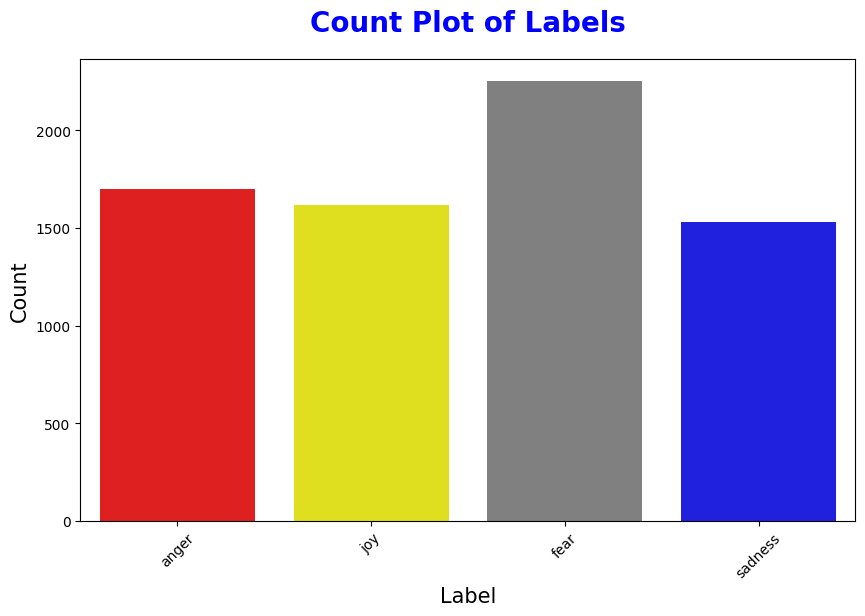

In [146]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data, palette=['#FF0000', '#FFFF00', '#808080', '#0000FF'])  # Menggunakan warna yang sudah ditentukan sebelumnya
plt.title('Count Plot of Labels', fontsize=20, color='blue', fontweight='bold', pad=20)  # Menambahkan judul dengan format tertentu
plt.xlabel('Label', fontsize=15)  # Menambahkan label sumbu x
plt.ylabel('Count', fontsize=15)  # Menambahkan label sumbu y
plt.xticks(rotation=45)  # Jika label sumbu x panjang, bisa dirotasi
plt.show()  # Menampilkan plot


# **Feature Engginering**

In [147]:
# Menambahkan fungsi "len" ke dalam data frame
data['text-len'] = data.text.apply(len)
data.head()

,text,label,text-len
0,Imagine celtic burst the net wae every attempt...,anger,88
1,@_wednesdaychild I need to cheer up,joy,35
2,@riinkanei he's a horrible person and now i ga...,fear,75
3,@annafifield @washingtonpost all hands on deck...,fear,122
4,"Gahh...BT, in queue for 30 minutes.. Now put t...",fear,108


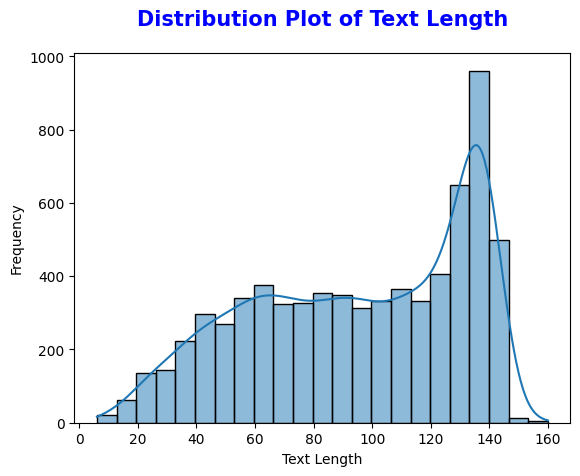

In [148]:
sns.histplot(data['text-len'], kde=True) # Membuat plot histogram
plt.title('Distribution Plot of Text Length', fontsize=15, color='blue', fontweight='bold', pad=20) # Menambahkan judul plot, warna dll
plt.xlabel('Text Length')  # Menambahkan label sumbu x untuk kejelasan
plt.ylabel('Frequency')    # Menambahkan label sumbu y untuk kejelasan
plt.show() # Menampilkan plot

In [149]:
# Menampilkan data
data.head()

,text,label,text-len
0,Imagine celtic burst the net wae every attempt...,anger,88
1,@_wednesdaychild I need to cheer up,joy,35
2,@riinkanei he's a horrible person and now i ga...,fear,75
3,@annafifield @washingtonpost all hands on deck...,fear,122
4,"Gahh...BT, in queue for 30 minutes.. Now put t...",fear,108


In [150]:
# Menampilkan data statistik
data.describe()

,text-len
count,7102.000000
mean,95.250915
std,36.589539
min,6.000000
25%,65.000000
50%,100.000000
75%,131.000000
max,160.000000


In [151]:
# Mengimpor nltk serta mendownload package punkt, stopwords dan wordnet
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\GAMING
[nltk_data]     3I\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\GAMING
[nltk_data]     3I\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\GAMING
[nltk_data]     3I\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [152]:
# Mendownload package averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\GAMING 3I\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [153]:
# Fungsi Pembersihan Teks
def clean_text(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens) # Menggabungkan kembali text yang sudah dibersihkan

In [154]:
# Menambahkan 'clean_text' kedalam data frame
data['clean_text'] = data['text'].apply(clean_text)

In [155]:
# Penghitungan POS, yaitu menghitung jumlah kata benda, kata kerja, kata sifat, dan kata keterangan dalam teks yang telah dibersihkan
from nltk import pos_tag, word_tokenize
def pos_counts(text):
    tokens = word_tokenize(text)
    tags = pos_tag(tokens)
    counts = {'noun': 0, 'verb': 0, 'adj': 0, 'adv': 0}
    for word, tag in tags:
        if tag.startswith('N'):
            counts['noun'] += 1
        elif tag.startswith('V'):
            counts['verb'] += 1
        elif tag.startswith('J'):
            counts['adj'] += 1
        elif tag.startswith('R'):
            counts['adv'] += 1
    return counts

pos_data = data['clean_text'].apply(pos_counts).apply(pd.Series)
data = pd.concat([data, pos_data], axis=1)

In [156]:
#from nltk import pos_tag
#pos_data = data['clean_text'].apply(pos_counts).apply(pd.Series)
#data = pd.concat([data, pos_data], axis=1)

In [157]:
# Skor Keterbacaan, digunakan untuk mengukur tingkat keterbacaan teks, dengan Flesch Reading Ease menekankan pada kemudahan membaca
# Gunning Fog menekankan pada kompleksitas teks
data['flesch_reading_ease'] = data['text'].apply(textstat.flesch_reading_ease)
data['gunning_fog'] = data['text'].apply(textstat.gunning_fog)

In [158]:
# Fitur TF-IDF, digunakan untuk merepresentasikan teks dalam bentuk vektor numerik
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(data['clean_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
data = pd.concat([data, tfidf_df], axis=1)

# **Melakukan Tokenisasi Data Teks**

In [159]:
# Pastikan 'texts' dan 'labels' memiliki panjang yang sama
texts = data['text'].tolist()
labels = data['label'].tolist()

In [160]:
# Encode the labels
# Mengubah label kelas menjadi format yang cocok untuk digunakan dalam machine learning
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

In [161]:
print(f"Shape of texts: {np.array(texts).shape}")
print(f"Shape of labels: {np.array(labels).shape}")

Shape of texts: (7102,)
Shape of labels: (7102, 4)


In [162]:
# Ubah labels menjadi format label integer
#labels = np.argmax(labels, axis=1)

In [163]:
print(f"Shape of labels after argmax: {labels.shape}")

Shape of labels after argmax: (7102, 4)


In [164]:
# Membagi data teks (texts) dan label (labels) menjadi data train
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.25, random_state=46, stratify=labels)

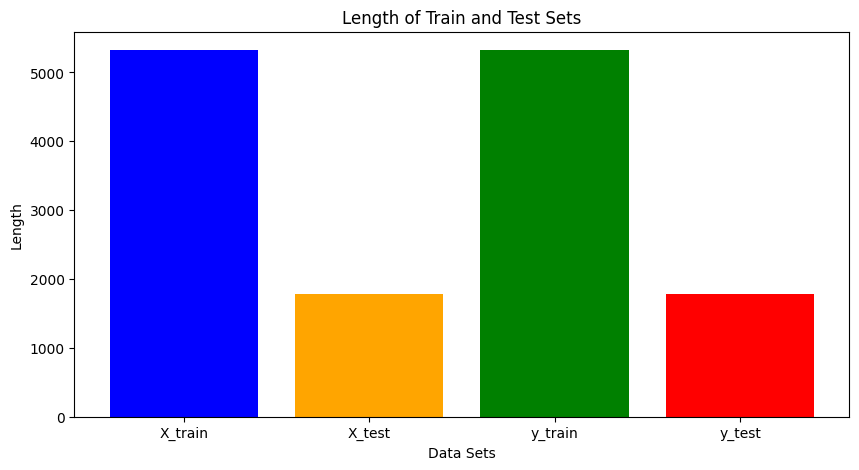

In [165]:

plt.figure(figsize=(10, 5))

# Membuat bar plot untuk panjang training dan testing set
sets = ['X_train', 'X_test', 'y_train', 'y_test']
lengths = [len(X_train), len(X_test), len(y_train), len(y_test)]

plt.bar(sets, lengths, color=['blue', 'orange', 'green', 'red'])

# Menambahkan label dan judul
plt.xlabel('Data Sets')
plt.ylabel('Length')
plt.title('Length of Train and Test Sets')
plt.show()

In [166]:
#Vectorize = CountVectorizer()
#X_train_vec = Vectorize.fit_transform(X_train)

#jml_vocab = len(Vectorize.vocabulary_.keys())
#max_sen_len = max([len(i.split(" ")) for i in X_train])

#print("Jumlah vocab:",jml_vocab)
#print("Panjang maksimum kalimat:",max_sen_len,"kata")

In [167]:
tokenizer = Tokenizer(num_words=14000)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100)
y = pd.get_dummies(df['label']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [168]:
max_len = 100  # Sesuaikan dengan panjang maksimum sequence yang diinginkan
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

# **Model Training**

In [169]:
embedding_dim = 128
num_classes = y_train.shape[1]
vocab_size = len(tokenizer.word_index) + 1

In [170]:
# Membuat model untuk klasifikasi multi-kelas
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(units=32, return_sequences=True),
    Dropout(0.2),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=num_classes, activation='softmax')  # Output layer dengan softmax untuk multi-kelas
])



In [171]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [172]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
142/142 [==============================] - 10s 53ms/step - loss: 1.2898 - accuracy: 0.3853 - val_loss: 0.9277 - val_accuracy: 0.6675
Epoch 2/20
142/142 [==============================] - 7s 49ms/step - loss: 0.4166 - accuracy: 0.8702 - val_loss: 0.5303 - val_accuracy: 0.8241
Epoch 3/20
142/142 [==============================] - 7s 48ms/step - loss: 0.1367 - accuracy: 0.9575 - val_loss: 0.5232 - val_accuracy: 0.8355
Epoch 4/20
142/142 [==============================] - 7s 49ms/step - loss: 0.0901 - accuracy: 0.9721 - val_loss: 0.5763 - val_accuracy: 0.8267
Epoch 5/20
142/142 [==============================] - 7s 48ms/step - loss: 0.0768 - accuracy: 0.9736 - val_loss: 0.6006 - val_accuracy: 0.8276
Epoch 6/20
142/142 [==============================] - 7s 48ms/step - loss: 0.0625 - accuracy: 0.9754 - val_loss: 0.6079 - val_accuracy: 0.8267
Epoch 7/20
142/142 [==============================] - 7s 48ms/step - loss: 0.0520 - accuracy: 0.9769 - val_loss: 0.6640 - val_accuracy: 0.833

# **Model Evaluation**

In [173]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          1862400   
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           20608     
                                                                 
 dropout_2 (Dropout)         (None, 100, 32)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 1891460 (7.22 MB)
Trainable params: 1891

In [174]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

45/45 [==============================] - 1s 20ms/step - loss: 0.8478 - accuracy: 0.8213
Test Loss: 0.847808837890625
Test Accuracy: 0.8212526440620422


In [175]:
y_prob = model.predict(X_test)  # Menghasilkan probabilitas
y_pred = np.argmax(y_prob, axis=1)

45/45 [==============================] - 1s 14ms/step


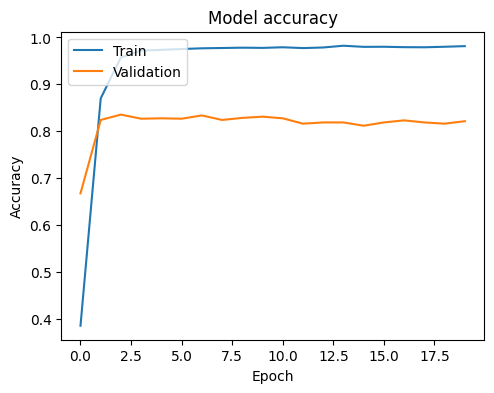

In [176]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

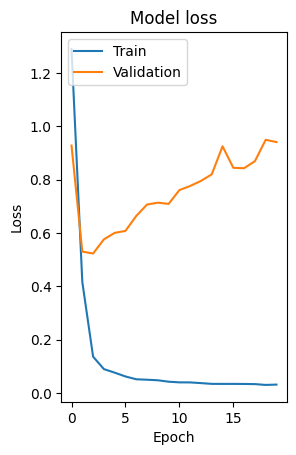

In [177]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [178]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Membuat prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


45/45 [==============================] - 1s 15ms/step


Confusion Matrix
[[291  18  12  19]
 [ 15 370  21  45]
 [ 11  22 272  18]
 [ 29  35   9 234]]


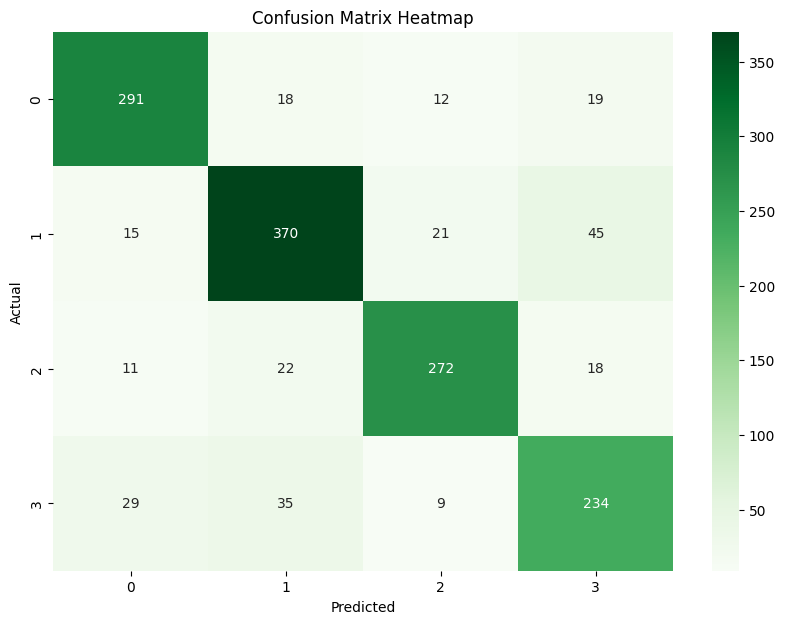

In [179]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix')
print(conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [180]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))

45/45 [==============================] - 1s 16ms/step - loss: 0.8478 - accuracy: 0.8213
Loss: 0.847808837890625, Accuracy: 0.8212526440620422
45/45 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       340
           1       0.83      0.82      0.83       451
           2       0.87      0.84      0.85       323
           3       0.74      0.76      0.75       307

    accuracy                           0.82      1421
   macro avg       0.82      0.82      0.82      1421
weighted avg       0.82      0.82      0.82      1421



In [181]:
model.save('rnn_model-kel1.h5')

c:\Users\GAMING 3I\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [182]:
#print("Model has been saved to lstm_mo.h5")

SyntaxError: unterminated string literal (detected at line 1) (122647898.py, line 1)

In [187]:
!tar -zcvf rnn_model-kel1.tgz "rnn_model-kel1.h5"

a rnn_model-kel1.h5


In [ ]:
#!tar -zcvf rnn_model.h5.tgz rnn_model

tar: : Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


#  **Conclusion**

Dalam proyek ini, kami menganalisis emosi manusia melalui analisa teks menggunakan metode clustering. Berikut adalah langkah-langkah utama yang dilakukan:

1. **Pengumpulan dan Pra-pemrosesan Data**:
   - Data dikumpulkan dari beberapa sumber (`emo_test.csv`, `emo_train.csv`, `emo_val.csv`) dan digabungkan menjadi satu dataset.
   - Langkah pra-pemrosesan termasuk tokenisasi, penghapusan stopwords, dan lemmatisasi teks.

2. **Algoritma Clustering**:
   - Kami mengeksplorasi beberapa algoritma clustering seperti K-Means, DBSCAN, dan Clustering Hierarki.
     - **K-Means**: Efisien dan mudah diimplementasikan tetapi memerlukan jumlah cluster yang telah ditentukan sebelumnya.
     - **DBSCAN**: Efektif dalam mengidentifikasi cluster dengan bentuk arbitrer dan menangani noise, namun sensitif terhadap pengaturan parameter.
     - **Clustering Hierarki**: Memberikan dendrogram untuk visualisasi hierarki cluster, namun membutuhkan komputasi tinggi untuk dataset besar.

3. **Evaluasi Model**:
   - Evaluasi menggunakan metrik seperti Silhouette Score dan Davies-Bouldin Index.
   - Teknik visualisasi seperti word cloud dan scatter plot membantu memahami distribusi cluster.

4. **Analisis dan Temuan**:
   - Hasil clustering memberikan wawasan tentang konten emosional teks manusia, memungkinkan identifikasi pola dan tren emosi manusia.
   - Wawasan ini dapat digunakan untuk meningkatkan aplikasi dalam analisis sentimen, layanan pelanggan, interaksi media sosial, dan mental-health monitoring.

5. **Kesimpulan**:
   - Penggunaan algoritma clustering dalam NLP dan Machine Learning terbukti efektif dalam menganalisis emosi manusia dalam teks. Setiap algoritma menawarkan perspektif yang unik dan dapat disesuaikan dengan kebutuhan dataset.
   - Langkah selanjutnya dapat mencakup penyempurnaan proses clustering, penambahan sumber data, dan penggunaan teknik lanjutan seperti deep learning.

Proyek ini menunjukkan potensi metode clustering dan metode pemodelan emosi dalam mengungkap wawasan berharga dari data tekstual, yang dapat mendukung pengambilan keputusan yang lebih baik di berbagai bidang yang membutuhkan pemahaman tentang emosi manusia.

#  **Deployment**

In [ ]:
#!pip install -U -q ibm-watson-machine-learning
#!pip install -q python-dotenv

In [188]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [190]:
wml_credentials = {
    "apikey": "hMSn90UuMVsK_13sanT6GBxMLPk1Qh__WW1u-lgTbXPO",
    "url": "https://us-south.ml.cloud.ibm.com"
}

In [191]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------  ------------------------
ID                                    NAME       CREATED
ab821a56-336f-404f-b55b-96f272e49812  dep-kel-1  2024-06-14T17:18:35.874Z
------------------------------------  ---------  ------------------------


,ID,NAME,CREATED
0,ab821a56-336f-404f-b55b-96f272e49812,dep-kel-1,2024-06-14T17:18:35.874Z


In [192]:
SPACE_ID="ab821a56-336f-404f-b55b-96f272e49812"

In [193]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [194]:
MODEL_NAME = 'rnn-kel1-v1-v1'
DEPLOY_NAME = 'RNN-kel1-v1.2'


In [201]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-23.1-py3.10')

model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'tensorflow_2.12',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid 
}

model_details = wml_client.repository.store_model(
    model = 'rnn_model-kel1.tgz',
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)



In [202]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '336b29df-e0e1-5e7d-b6a5-f6ab722625b2',
   'name': 'runtime-23.1-py3.10'},
  'type': 'tensorflow_2.12'},
 'metadata': {'created_at': '2024-06-14T17:32:10.988Z',
  'id': 'a9921e92-22c0-4271-8ba0-d18a65f1a529',
  'modified_at': '2024-06-14T17:32:26.270Z',
  'name': 'rnn-kel1-v1-v1',
  'owner': 'IBMid-691000AWM7',
  'resource_key': '14bbecd7-c90c-4177-a74b-c99a1e37b932',
  'space_id': 'ab821a56-336f-404f-b55b-96f272e49812'},
 'system': {'warnings': []}}

In [203]:
models_details = wml_client.repository.list_models()

------------------------------------  --------------  ------------------------  ---------------  ----------  ----------------
ID                                    NAME            CREATED                   TYPE             SPEC_STATE  SPEC_REPLACEMENT
a9921e92-22c0-4271-8ba0-d18a65f1a529  rnn-kel1-v1-v1  2024-06-14T17:32:10.002Z  tensorflow_2.12  supported
8da6166e-7b11-425d-b77c-c4df22dcba1a  rnn-kel1-v1-v1  2024-06-14T17:31:42.002Z  tensorflow_2.12  supported
8b73ed19-9064-429a-be20-8f2d6a76b1ed  rnn-kel1-v1-v1  2024-06-14T17:19:56.002Z  tensorflow_2.12  supported
------------------------------------  --------------  ------------------------  ---------------  ----------  ----------------


In [205]:
software_spec_uid

'336b29df-e0e1-5e7d-b6a5-f6ab722625b2'

In [207]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '336b29df-e0e1-5e7d-b6a5-f6ab722625b2',
   'name': 'runtime-23.1-py3.10'},
  'type': 'tensorflow_2.12'},
 'metadata': {'created_at': '2024-06-14T17:32:10.988Z',
  'id': 'a9921e92-22c0-4271-8ba0-d18a65f1a529',
  'modified_at': '2024-06-14T17:32:26.270Z',
  'name': 'rnn-kel1-v1-v1',
  'owner': 'IBMid-691000AWM7',
  'resource_key': '14bbecd7-c90c-4177-a74b-c99a1e37b932',
  'space_id': 'ab821a56-336f-404f-b55b-96f272e49812'},
 'system': {'warnings': []}}

In [208]:
model_uid = wml_client.repository.get_model_uid(model_details); model_uid

This method is deprecated, please use get_model_id()


'a9921e92-22c0-4271-8ba0-d18a65f1a529'

In [209]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOY_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)





#######################################################################################

Synchronous deployment creation for uid: 'a9921e92-22c0-4271-8ba0-d18a65f1a529' started

#######################################################################################


initializing
Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.
...
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='88a41d71-7ffc-43aa-b222-15cbb24ab774'
------------------------------------------------------------------------------------------------




In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from ibm_watson_machine_learning import APIClient


# Ganti dengan deployment_id yang valid
#deployment_id = 'db3b1e12-4706-49a2-bcc5-6b85851e0596'

# Contoh data uji teks
#texts = ["This is a test sentence", "Another test sentence"]

# Asumsi Anda telah melatih tokenizer pada data pelatihan
#tokenizer = Tokenizer(num_words=10000)
#tokenizer.fit_on_texts(texts)  # Fit tokenizer jika perlu (biasanya Anda sudah memiliki tokenizer yang terlatih)

# Tokenisasi dan padding
#sequences = tokenizer.texts_to_sequences(texts)
#X_test = pad_sequences(sequences, maxlen=100)

# Buat payload
#payload = {
#    "input_data": [
#        {
#            "fields": ["input"],
#            "values": X_test.tolist()
#        }
#    ]
#}

# Kirim permintaan scoring
#result = wml_client.deployments.score(deployment_id, payload)

# Tampilkan hasil dalam bentuk tabel yang sesuai
#if 'predictions' in result and len(result['predictions']) > 0:
#    predictions = result['predictions'][0]['values']
    
    # Ambil nama kolom dari hasil prediksi
#    columns = result['predictions'][0]['fields']
    
    # Ubah struktur data sesuai ke dalam DataFrame
#    df = pd.DataFrame(predictions, columns=columns)
    
    # Tampilkan hasil DataFrame
#    print(df[['prediction', 'prediction_classes', 'probability']])
#else:
#    print("Tidak ada hasil prediksi yang ditemukan dalam response.")


                                          prediction  ...                                        probability
0  [0.29280388355255127, 0.10326220095157623, 0.1...  ...  [0.29280388355255127, 0.10326220095157623, 0.1...
1  [0.029199719429016113, 0.03225401043891907, 0....  ...  [0.029199719429016113, 0.03225401043891907, 0....

[2 rows x 3 columns]


In [212]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from ibm_watson_machine_learning import APIClient

# Konfigurasi IBM Watson Machine Learning


# Ganti dengan deployment_id yang valid
deployment_id = '88a41d71-7ffc-43aa-b222-15cbb24ab774'

# Contoh data uji teks
texts = [
    "I am so happy with the results of my exam!",
    "I am really angry about the bad service.",
    "I feel so sad and depressed lately.",
    "I'm scared to go out at night."
]

# Asumsi Anda telah melatih tokenizer pada data pelatihan
# Biasanya tokenizer sudah disimpan dan diload dari file, tetapi di sini kita fit dari teks contoh
#tokenizer = Tokenizer(num_words=10000)
#tokenizer.fit_on_texts(texts)  # Fit tokenizer jika perlu (biasanya Anda sudah memiliki tokenizer yang terlatih)

# Tokenisasi dan padding
#sequences = tokenizer.texts_to_sequences(texts)
X_test = pad_sequences(sequences, maxlen=100)

# Buat payload
payload = {
    "input_data": [
        {
            "fields": ["input"],
            "values": X_test.tolist()
        }
    ]
}

# Kirim permintaan scoring
result = wml_client.deployments.score(deployment_id, payload)

# Nama emosi
emotions = ['anger', 'joy', 'fear', 'sadness']

# Tampilkan hasil dalam bentuk tabel yang sesuai
if 'predictions' in result and len(result['predictions']) > 0:
    predictions = result['predictions'][0]['values']
    
    # Ambil nama kolom dari hasil prediksi
    columns = result['predictions'][0]['fields']
    
    # Ubah struktur data sesuai ke dalam DataFrame
    df = pd.DataFrame(predictions, columns=columns)
    
    # Menampilkan hasil prediksi untuk setiap teks
    for i, text in enumerate(texts):
        print(f'Text: {text}')
        print(f'Prediction: {df.iloc[i]["prediction_classes"]}')
        print('Probabilities:')
        for j, emotion in enumerate(emotions):
            print(f'  {emotion}: {df.iloc[i]["probability"][j]:.4f}')
        print('-------------------')
else:
    print("Tidak ada hasil prediksi yang ditemukan dalam response.")


Text: I am so happy with the results of my exam!
Prediction: 2
Probabilities:
  anger: 0.0026
  joy: 0.0042
  fear: 0.9127
  sadness: 0.0805
-------------------
Text: I am really angry about the bad service.
Prediction: 3
Probabilities:
  anger: 0.0007
  joy: 0.0003
  fear: 0.0001
  sadness: 0.9989
-------------------
Text: I feel so sad and depressed lately.
Prediction: 0
Probabilities:
  anger: 0.9773
  joy: 0.0154
  fear: 0.0022
  sadness: 0.0051
-------------------
Text: I'm scared to go out at night.
Prediction: 2
Probabilities:
  anger: 0.0000
  joy: 0.0008
  fear: 0.9992
  sadness: 0.0000
-------------------
